## Exercise 1

Given the following data:

| Tid | Refund | Marital Status | Taxable Income (K) | Cheat |
|-----|--------|----------------|--------------------|-------|
| 1   | Yes    | Single         | 125                | No    |
| 2   | No     | Married        | 100                | No    |
| 3   | No     | Single         | 70                 | No    |
| 4   | Yes    | Married        | 120                | No    |
| 5   | No     | Divorced       | 95                 | Yes   |
| 6   | No     | Married        | 60                 | No    |
| 7   | Yes    | Divorced       | 220                | No    |
| 8   | No     | Single         | 85                 | Yes   |
| 9   | No     | Married        | 75                 | No    |
| 10  | No     | Single         | 90                 | Yes   |

What is the best first split (using Gini - note, for the continuous feature, check quartile boundaries).

In [2]:
def gini_impurity(instances):
    total_instances = sum(instances.values())
    impurity = 1
    for count in instances.values():
        probability = count / total_instances
        impurity -= probability**2
    return impurity

# Calculate Gini impurity for Refund=Yes
refund_yes = {'Cheat=Yes': 0, 'Cheat=No': 3}
gini_refund_yes = gini_impurity(refund_yes)

# Calculate Gini impurity for Refund=No
refund_no = {'Cheat=Yes': 3, 'Cheat=No': 4}
gini_refund_no = gini_impurity(refund_no)

# Calculate weighted average Gini impurity for Refund split
total_instances = sum(refund_yes.values()) + sum(refund_no.values())
average_gini_refund = (sum(refund_yes.values()) / total_instances) * gini_refund_yes \
                      + (sum(refund_no.values()) / total_instances) * gini_refund_no

print(f"Gini for refund =  {average_gini_refund}")


Gini for refund =  0.34285714285714286


## Exercise 2

Build a decision tree to fit the [federalist papers](https://www.kaggle.com/datasets/tobyanderson/federalist-papers_) data, available in the data directory (click on the link to find out more information about this data). Note that you should restrict your analysis to papers by Hamilton or Madison.  Plot your training and test scores to pick a value for ccp_alpha. What did you pick?  Run your trained classifier on the "disputed" papers.  What does your model tell you? 

## Exercise 3

Build a voting classifier for the federalist papers, using all of the non-ensemble methods you've been exposed to in this class thus far (i.e., KNN, SVM, logistic regression, naive bayes, SGDClassifier, decision tree).

1) Compare this to a RandomForest classifier.  Which works the best?
2) Compare this to a GradientBoosting classifier.  Which works the best?
3) Add the RandomForest and GradientBoosting classifiers to your voting classifier.  Does you performance improve?

In [8]:
import pandas as pd 
data=pd.read_csv("/workspaces/707-lecture-master/5-week5/data/federalistpapers.csv")
data=data.drop("filename",axis=1)

train=data[data.author!='dispt']
test=data[data.author=='dispt']

train=train[train.author.isin(["Hamilton","Madison"])]
train.author.value_counts()

train['author']=train.author=='Madison'
train.author.value_counts()

author
False    51
True     15
Name: count, dtype: int64

In [9]:
train.head()

,author,a,all,also,an,and,any,are,as,at,...,was,were,what,when,which,who,will,with,would,your
11,False,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,0.065,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,False,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,0.065,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,False,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,0.088,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,False,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,0.015,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,False,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,0.115,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [10]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generating a dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Defining the classifiers
log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(probability=True, random_state=42) # 'probability=True' to enable soft voting
tree_clf = DecisionTreeClassifier(random_state=42)

voting_hard_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svm', svm_clf), ('tree', tree_clf)],
    voting='hard')
voting_hard_clf.fit(X_train, y_train)

voting_soft_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svm', svm_clf), ('tree', tree_clf)],
    voting='soft')
voting_soft_clf.fit(X_train, y_train)

# Evaluating classifiers
for clf in (log_clf, svm_clf, tree_clf, voting_hard_clf, voting_soft_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.852
SVC 0.916
DecisionTreeClassifier 0.892
VotingClassifier 0.912
VotingClassifier 0.916


## Exercise 4

When does it make sense to use a Bagging Classifier?  In the following, explore different data parameters to develop your intuition for which classifier makes sense in which situation. 

1. Gradually increase the noise in the data (using the noise parameter).  How do the different classifiers perform.  Why?


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X, y = make_moons(n_samples=300, noise=1.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_train_pred_tree = tree.predict(X_train)
print("Decision Tree Accuracy (train):", accuracy_score(y_train, y_train_pred_tree))
print("Decision Tree Accuracy (test):", accuracy_score(y_test, y_pred_tree))



log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_train_pred_log = log_reg.predict(X_train)
print("Logistic Regression Accuracy (train):", accuracy_score(y_train, y_train_pred_log))
print("Logistic Regression Accuracy (test):", accuracy_score(y_test, y_pred_log))

Decision Tree Accuracy (train): 1.0
Decision Tree Accuracy (test): 0.64
Logistic Regression Accuracy (train): 0.7333333333333333
Logistic Regression Accuracy (test): 0.6933333333333334


2.  Now, do the same thing in the following.  What do you notice. How do you explain your observations?

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

max_samples = 100

X, y = make_moons(n_samples=300, noise=1.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bag_tree = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, random_state=42,max_samples=max_samples)
bag_tree.fit(X_train, y_train)
y_pred_bag_train = bag_tree.predict(X_train)
y_pred_bag = bag_tree.predict(X_test)
print("Bagging Decision Tree Accuracy (train):", accuracy_score(y_train, y_pred_bag_train))
print("Bagging Decision Tree Accuracy (test):", accuracy_score(y_test, y_pred_bag))


bag_log = BaggingClassifier(LogisticRegression(), n_estimators=500, random_state=42,max_samples=max_samples)
bag_log.fit(X_train, y_train)
y_pred_bag_log_train = bag_log.predict(X_train)
y_pred_bag_log = bag_log.predict(X_test)
print("Bagging Logistic Regression Accuracy (train):", accuracy_score(y_train, y_pred_bag_log_train))
print("Bagging Logistic Regression Accuracy (test):", accuracy_score(y_test, y_pred_bag_log))

Bagging Decision Tree Accuracy (train): 0.88
Bagging Decision Tree Accuracy (test): 0.6933333333333334
Bagging Logistic Regression Accuracy (train): 0.7288888888888889
Bagging Logistic Regression Accuracy (test): 0.68


3. Now go back and start increasing the `max_samples` parameter.  How do things change? 

## Exercise 5

The "wine" dataset contains data about the chemical makeup of different varieties of wine and critics scores.  Use XGBoost to build a classifier for this data.  Manually tune the hyperparameters of the XGBoost model to try to achieve better accuracy on the test set than the baseline model. Some hyperparameters to consider tweaking:
   - `learning_rate`
   - `max_depth`
   - `n_estimators`
   - `gamma`
   - `subsample`
   - `colsample_bytree`

See [the online docs](https://xgboost.readthedocs.io/en/stable/parameter.html) for more info.

After tuning, use the `plot_importance` function again to see if feature importances have changed after tuning.


1. How did hyperparameter tuning affect the model's accuracy? Which hyperparameters seemed to have the most influence?
2. Did feature importances change after tuning? If so, why might that be?

In [22]:
# Run this if you don't have XGBoost installed
%pip install XGBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.0 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Baseline Accuracy: 0.9444


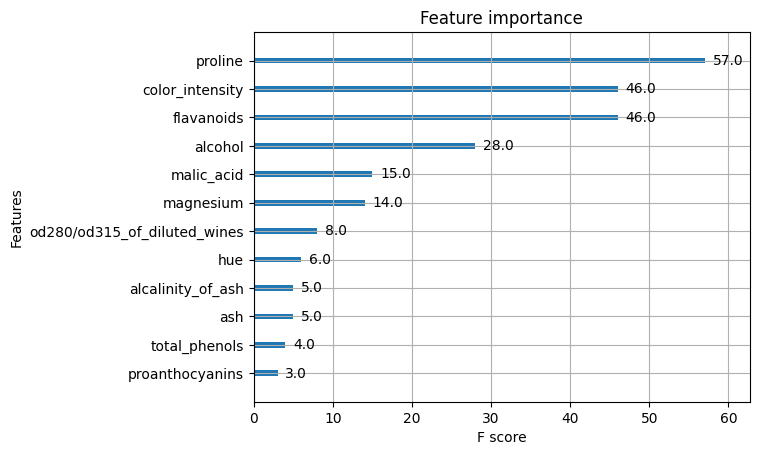

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance

data = load_wine()

# We'll use a data frame to make sure we get real feature names out
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = xgb.XGBClassifier(objective='multi:softprob', random_state=42)
clf.fit(X_train, y_train)

baseline_accuracy = clf.score(X_test, y_test)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

plot_importance(clf)
plt.show()